In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

from pathlib import Path


## tensorflow & Keras
import tensorflow as tf  

In [2]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/tets')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()


0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

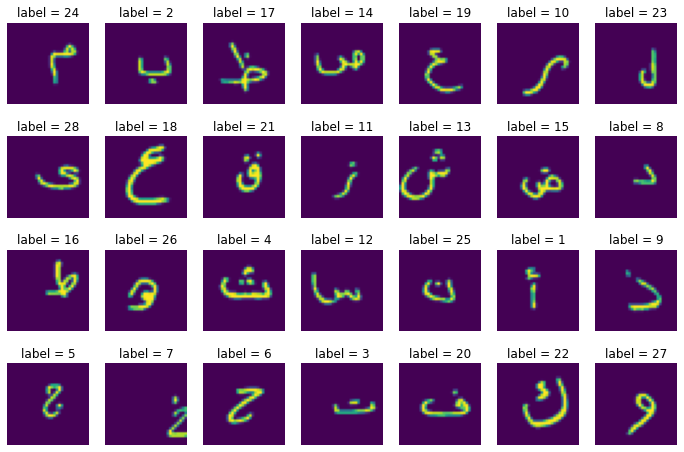

In [3]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [4]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


In [5]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=train_full_labels, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752,)
y_valid.shape => (2688,)


In [7]:
# # Define the K-fold Cross Validator
# from sklearn.model_selection import KFold

# num_folds = 3
# batch_size = 128
# no_epochs = 150
# kfold = KFold(n_splits=num_folds, shuffle=True)

# # K-fold Cross Validation model evaluation
# fold_no = 1
# for train, test in kfold.split(train_full_set, train_full_labels):

#   # Define the model architecture
#     model = Sequential()
#     model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(32,32,3), kernel_initializer='he_normal', activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))
#     model.add(GlobalAveragePooling2D())


#     #Fully connected final layer
#     model.add(Flatten())
#     model.add(Dense(29, activation='softmax'))

#     opt = keras.optimizers.Adam(learning_rate=0.001)
#     # Compile model
#     model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= opt)


#   # Generate a print
#     print('------------------------------------------------------------------------')
#     print(f'Training for fold {fold_no} ...')

#       # Fit data to model
#     history = model.fit(X_train, y_train,
#                   batch_size=batch_size,
#                   epochs=no_epochs,
#                   verbose=1)

#   # Generate generalization metrics
# #     scores = model.evaluate(X_val, y_val, verbose=0)
# #     print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# #     acc_per_fold.append(scores[1] * 100)
# #     loss_per_fold.append(scores[0])

#   # Increase fold number
#     fold_no = fold_no + 1

In [8]:
# Designing Model Architecture

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense , Flatten

# def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
# create model

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same',input_shape=(32,32,3), kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())


#Fully connected final layer
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001 , beta_1=0.99, beta_2=0.9999)
# Compile model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= opt)
# return model

history=model.fit(X_train, y_train, 
                validation_data=(X_valid, y_valid),
                epochs=250, batch_size=32, verbose=1)

# lr = 0.0001 , b1 = 0.99 , b2 = 0.9999 , epochs = 250 , batch_size = 64

2021-11-05 22:20:21.163169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 22:20:21.263428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 22:20:21.264154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-05 22:20:21.266504: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/250


2021-11-05 22:20:25.592168: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


336/336 [==============================] - 9s 5ms/step - loss: 2.8731 - accuracy: 0.1881 - val_loss: 3.9236 - val_accuracy: 0.0774
Epoch 2/250
336/336 [==============================] - 2s 5ms/step - loss: 1.9147 - accuracy: 0.4084 - val_loss: 1.5735 - val_accuracy: 0.5223
Epoch 3/250
336/336 [==============================] - 2s 5ms/step - loss: 1.3893 - accuracy: 0.5531 - val_loss: 1.0228 - val_accuracy: 0.6812
Epoch 4/250
336/336 [==============================] - 2s 5ms/step - loss: 1.0731 - accuracy: 0.6509 - val_loss: 0.7516 - val_accuracy: 0.7686
Epoch 5/250
336/336 [==============================] - 2s 5ms/step - loss: 0.8624 - accuracy: 0.7172 - val_loss: 0.6235 - val_accuracy: 0.7987
Epoch 6/250
336/336 [==============================] - 2s 5ms/step - loss: 0.7244 - accuracy: 0.7645 - val_loss: 0.5540 - val_accuracy: 0.8207
Epoch 7/250
336/336 [==============================] - 2s 5ms/step - loss: 0.6345 - accuracy: 0.7969 - val_loss: 0.4590 - val_accuracy: 0.8638
Epoch 8/250

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file="model.png", show_shapes=True)
# from IPython.display import Image as IPythonImage
# display(IPythonImage('model.png'))

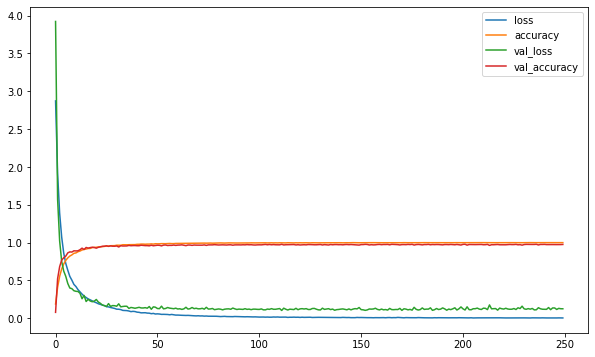

In [11]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [12]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.02496793121099472
acc_all_data => 0.9950149059295654


In [13]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()



0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [14]:
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [15]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [16]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)
test_labels['label'] = y_preds_classes

In [17]:

test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


In [18]:

test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)